# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Used Car Business
Used car business is a big business around the world. A car dealer is looking for are price predicting system to get fast sales prices for their offered cars. The dealer provides a big dataset with over 100 years old car informations.

### Expected Solution
The expected solution should be provide in minimum two regression models on cleaned data and based on the most important price relevant features. The solution should compare the found models and provide a recommendation.

### Python Usage
Currently Python ML models are the most advanced one in the industry all over the world. Therefor the Scikit-Learn library will be used for the data analyzing.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
from sklearn.linear_model import Ridge
set_config(display="diagram")


import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
vehicles = pd.read_csv('data/vehicles.csv')

In [3]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
vehicles.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [5]:
vehicles.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [6]:
# Check for missing data
vehicles.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [7]:
#check for duplicated data and drop them if so
vehicles.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
426875    False
426876    False
426877    False
426878    False
426879    False
Length: 426880, dtype: bool

### Data Observation
The dataset consists of 18 columns and around 426k of rows.
The dataset provides 2 numeric columns (without the id). There also many 'NaN' values.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

### Decisions
#### 1.) Drop all rows with NaNs
#### 2.) Remove duplicates
#### 3.) Remove all rows with unrealistic values (zero etc.)
#### 4.) Prepare all relevant columns for feature selection (age instead of year etc.)

In [8]:
vehicles.drop_duplicates()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [9]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [10]:
#there was no duplicates, because the we still the same amount of data rows

In [11]:
# let´s see how the data looks like for car manufacturer
result = vehicles.loc[(vehicles['manufacturer'] > ''), ['manufacturer']]
result = result.groupby('manufacturer').agg(max)
for i in range (len(result)):
    print(f"Show car manufacturer <{i}> data value:  ", result.iloc[i])

Show car manufacturer <0> data value:   Series([], Name: acura, dtype: float64)
Show car manufacturer <1> data value:   Series([], Name: alfa-romeo, dtype: float64)
Show car manufacturer <2> data value:   Series([], Name: aston-martin, dtype: float64)
Show car manufacturer <3> data value:   Series([], Name: audi, dtype: float64)
Show car manufacturer <4> data value:   Series([], Name: bmw, dtype: float64)
Show car manufacturer <5> data value:   Series([], Name: buick, dtype: float64)
Show car manufacturer <6> data value:   Series([], Name: cadillac, dtype: float64)
Show car manufacturer <7> data value:   Series([], Name: chevrolet, dtype: float64)
Show car manufacturer <8> data value:   Series([], Name: chrysler, dtype: float64)
Show car manufacturer <9> data value:   Series([], Name: datsun, dtype: float64)
Show car manufacturer <10> data value:   Series([], Name: dodge, dtype: float64)
Show car manufacturer <11> data value:   Series([], Name: ferrari, dtype: float64)
Show car manufac

In [12]:
# let´s see how the data looks like for car transmission
result = vehicles.loc[(vehicles['transmission'] > ''), ['transmission']]
result = result.groupby('transmission').agg(max)
for i in range (len(result)):
    print(f"Show car transmission <{i}> data value:  ", result.iloc[i])

Show car transmission <0> data value:   Series([], Name: automatic, dtype: float64)
Show car transmission <1> data value:   Series([], Name: manual, dtype: float64)
Show car transmission <2> data value:   Series([], Name: other, dtype: float64)


In [13]:
# let´s see how the data looks like for car cylinders
result = vehicles.loc[(vehicles['cylinders'] > ''), ['cylinders']]
result = result.groupby('cylinders').agg(max)
for i in range (len(result)):
    print(f"Show car cylinders <{i}> data value:  ", result.iloc[i])

Show car cylinders <0> data value:   Series([], Name: 10 cylinders, dtype: float64)
Show car cylinders <1> data value:   Series([], Name: 12 cylinders, dtype: float64)
Show car cylinders <2> data value:   Series([], Name: 3 cylinders, dtype: float64)
Show car cylinders <3> data value:   Series([], Name: 4 cylinders, dtype: float64)
Show car cylinders <4> data value:   Series([], Name: 5 cylinders, dtype: float64)
Show car cylinders <5> data value:   Series([], Name: 6 cylinders, dtype: float64)
Show car cylinders <6> data value:   Series([], Name: 8 cylinders, dtype: float64)
Show car cylinders <7> data value:   Series([], Name: other, dtype: float64)


In [14]:
# cylinders are normally a important value therefore I check how many dataset do not have cylinder values

In [15]:
# let´s see how many dataset do not have a fuel value
result = vehicles.loc[(vehicles['fuel'] == 'other'), ['fuel']]
print(f"Show sum cars with fuel <unkown> :  ", len(result))

Show sum cars with fuel <unkown> :   30728


In [16]:
#In my opinion the fuel type of car is important and should be integrated in the model
#Therefore I use all datasets with a fuel value
vehicles_clean = vehicles[vehicles['fuel'] != 'other']

In [17]:
# let´s see how the data looks like for car fuel
result = vehicles.loc[(vehicles['fuel'] > ''), ['fuel']]
result = result.groupby('fuel').agg(max)
for i in range (len(result)):
    print(f"Show car fuel <{i}> data value:  ", result.iloc[i])

Show car fuel <0> data value:   Series([], Name: diesel, dtype: float64)
Show car fuel <1> data value:   Series([], Name: electric, dtype: float64)
Show car fuel <2> data value:   Series([], Name: gas, dtype: float64)
Show car fuel <3> data value:   Series([], Name: hybrid, dtype: float64)
Show car fuel <4> data value:   Series([], Name: other, dtype: float64)


In [18]:
# Convert the fuel to numeric data
# diesel is maybe more attractive for buying --> 4
# gas ist maybe --> 3
# hybrid --> 2
# electric --> 1
vehicles_clean.replace('diesel','4', inplace=True)
vehicles_clean.replace('gas','3', inplace=True)
vehicles_clean.replace('hybrid','2', inplace=True)
vehicles_clean.replace('electric','1', inplace=True)
vehicles_clean['fuel'] = vehicles_clean['fuel'].astype(float)
vehicles_clean.info()

C:\Users\UNR\AppData\Local\Temp\ipykernel_9108\2692324824.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles_clean.replace('diesel','4', inplace=True)
C:\Users\UNR\AppData\Local\Temp\ipykernel_9108\2692324824.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles_clean.replace('gas','3', inplace=True)
C:\Users\UNR\AppData\Local\Temp\ipykernel_9108\2692324824.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles_c

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396152 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            396152 non-null  int64  
 1   region        396152 non-null  object 
 2   price         396152 non-null  int64  
 3   year          394958 non-null  float64
 4   manufacturer  379795 non-null  object 
 5   model         391605 non-null  object 
 6   condition     231250 non-null  object 
 7   cylinders     242399 non-null  object 
 8   fuel          393139 non-null  float64
 9   odometer      391843 non-null  float64
 10  title_status  388031 non-null  object 
 11  transmission  393704 non-null  object 
 12  VIN           237065 non-null  object 
 13  drive         279611 non-null  object 
 14  size          118998 non-null  object 
 15  type          305635 non-null  object 
 16  paint_color   273872 non-null  object 
 17  state         396152 non-null  object 
dtypes: f

In [19]:
result = vehicles_clean.loc[(vehicles_clean['fuel'] > 0), ['fuel']]
result = result.groupby('fuel').agg(max)
for i in range (len(result)):
    print(f"Show car fuel <{i}> data value:  ", result.iloc[i])

Show car fuel <0> data value:   Series([], Name: 1.0, dtype: float64)
Show car fuel <1> data value:   Series([], Name: 2.0, dtype: float64)
Show car fuel <2> data value:   Series([], Name: 3.0, dtype: float64)
Show car fuel <3> data value:   Series([], Name: 4.0, dtype: float64)


In [20]:
# let´s see how the data looks like for car condition
result = vehicles.loc[(vehicles['condition'] > ''), ['condition']]
result = result.groupby('condition').agg(max)
for i in range (len(result)):
    print(f"Show car fuel <{i}> data value:  ", result.iloc[i])

Show car fuel <0> data value:   Series([], Name: excellent, dtype: float64)
Show car fuel <1> data value:   Series([], Name: fair, dtype: float64)
Show car fuel <2> data value:   Series([], Name: good, dtype: float64)
Show car fuel <3> data value:   Series([], Name: like new, dtype: float64)
Show car fuel <4> data value:   Series([], Name: new, dtype: float64)
Show car fuel <5> data value:   Series([], Name: salvage, dtype: float64)


In [21]:
# let´s see how many dataset do not have a fuel value
result = vehicles.loc[(vehicles['condition'] == 'salvage'), ['condition']]
print(f"Show sum cars with condition <salvage> :  ", len(result))

Show sum cars with condition <salvage> :   601


In [22]:
# In the dataset there are some salvage cars. They are not relevant for the model.
# Therefore I delete the them.
vehicles_clean = vehicles_clean[vehicles_clean['condition'] != 'salvage']
vehicles_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395562 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            395562 non-null  int64  
 1   region        395562 non-null  object 
 2   price         395562 non-null  int64  
 3   year          394368 non-null  float64
 4   manufacturer  379250 non-null  object 
 5   model         391033 non-null  object 
 6   condition     230660 non-null  object 
 7   cylinders     241919 non-null  object 
 8   fuel          392549 non-null  float64
 9   odometer      391253 non-null  float64
 10  title_status  387441 non-null  object 
 11  transmission  393114 non-null  object 
 12  VIN           236995 non-null  object 
 13  drive         279176 non-null  object 
 14  size          118663 non-null  object 
 15  type          305198 non-null  object 
 16  paint_color   273420 non-null  object 
 17  state         395562 non-null  object 
dtypes: f

In [23]:
# Now I will change the conditions to values:
# excellent --> 4
# new       --> 4
# like new  --> 3
# good      --> 2
# fair      --> 1
values={'excellent':'new'}
vehicles_clean  = vehicles_clean.fillna(value=values)
vehicles_clean.replace('excellent','new', inplace=True)
vehicles_clean.replace('new','4', inplace=True)
vehicles_clean.replace('like new','3', inplace=True)
vehicles_clean.replace('good','2', inplace=True)
vehicles_clean.replace('fair','1', inplace=True)

In [24]:
# let´s see how the data looks like for car condition
result = vehicles_clean.loc[(vehicles_clean['condition'] > ''), ['condition']]
result = result.groupby('condition').agg(max)
for i in range (len(result)):
    print(f"Show car fuel <{i}> data value:  ", result.iloc[i])

Show car fuel <0> data value:   Series([], Name: 1, dtype: float64)
Show car fuel <1> data value:   Series([], Name: 2, dtype: float64)
Show car fuel <2> data value:   Series([], Name: 3, dtype: float64)
Show car fuel <3> data value:   Series([], Name: 4, dtype: float64)


In [25]:
# Now convert the character to numbers
vehicles_clean['condition'] = vehicles_clean['condition'].astype(float)
vehicles_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395562 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            395562 non-null  int64  
 1   region        395562 non-null  object 
 2   price         395562 non-null  int64  
 3   year          394368 non-null  float64
 4   manufacturer  379250 non-null  object 
 5   model         391033 non-null  object 
 6   condition     230660 non-null  float64
 7   cylinders     241919 non-null  object 
 8   fuel          392549 non-null  float64
 9   odometer      391253 non-null  float64
 10  title_status  387441 non-null  object 
 11  transmission  393114 non-null  object 
 12  VIN           236995 non-null  object 
 13  drive         279176 non-null  object 
 14  size          118663 non-null  object 
 15  type          305198 non-null  object 
 16  paint_color   273420 non-null  object 
 17  state         395562 non-null  object 
dtypes: f

In [26]:
# let´s see how the data looks like for car condition
result = vehicles_clean.loc[(vehicles_clean['condition'] >= 0), ['condition']]
result = result.groupby('condition').agg(max)
for i in range (len(result)):
    print(f"Show car condition <{i}> data value:  ", result.iloc[i])

Show car condition <0> data value:   Series([], Name: 1.0, dtype: float64)
Show car condition <1> data value:   Series([], Name: 2.0, dtype: float64)
Show car condition <2> data value:   Series([], Name: 3.0, dtype: float64)
Show car condition <3> data value:   Series([], Name: 4.0, dtype: float64)


In [27]:
vehicles_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395562 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            395562 non-null  int64  
 1   region        395562 non-null  object 
 2   price         395562 non-null  int64  
 3   year          394368 non-null  float64
 4   manufacturer  379250 non-null  object 
 5   model         391033 non-null  object 
 6   condition     230660 non-null  float64
 7   cylinders     241919 non-null  object 
 8   fuel          392549 non-null  float64
 9   odometer      391253 non-null  float64
 10  title_status  387441 non-null  object 
 11  transmission  393114 non-null  object 
 12  VIN           236995 non-null  object 
 13  drive         279176 non-null  object 
 14  size          118663 non-null  object 
 15  type          305198 non-null  object 
 16  paint_color   273420 non-null  object 
 17  state         395562 non-null  object 
dtypes: f

In [28]:
# let´s see how the data looks like for car year
result = vehicles.loc[(vehicles['year'] >= 0), ['year']]
result = result.groupby('year').agg(max)
for i in range (len(result)):
    print(f"Show car year <{i}> data value:  ", result.iloc[i])

Show car year <0> data value:   Series([], Name: 1900.0, dtype: float64)
Show car year <1> data value:   Series([], Name: 1901.0, dtype: float64)
Show car year <2> data value:   Series([], Name: 1902.0, dtype: float64)
Show car year <3> data value:   Series([], Name: 1903.0, dtype: float64)
Show car year <4> data value:   Series([], Name: 1905.0, dtype: float64)
Show car year <5> data value:   Series([], Name: 1909.0, dtype: float64)
Show car year <6> data value:   Series([], Name: 1910.0, dtype: float64)
Show car year <7> data value:   Series([], Name: 1913.0, dtype: float64)
Show car year <8> data value:   Series([], Name: 1915.0, dtype: float64)
Show car year <9> data value:   Series([], Name: 1916.0, dtype: float64)
Show car year <10> data value:   Series([], Name: 1918.0, dtype: float64)
Show car year <11> data value:   Series([], Name: 1920.0, dtype: float64)
Show car year <12> data value:   Series([], Name: 1921.0, dtype: float64)
Show car year <13> data value:   Series([], Name

In [29]:
# There are not for all data the year information is set
# This is a important information.
# Therefore I delete all rows without year information
vehicles_clean = vehicles_clean[vehicles_clean['year'] > 1900]

In [30]:
# Compute from year the age of a car
vehicles_clean['age'] = 2022 - vehicles_clean['year'].astype(int)
vehicles_clean        = vehicles_clean.drop(columns=['year'])

In [31]:
# Drop all rows if price zero
vehicles_clean.drop(vehicles_clean.query("price == 0").index, inplace=True)

In [32]:
vehicles_clean.head()

,id,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,age
27,7316814884,auburn,33590,gmc,sierra 1500 crew cab slt,2.0,8 cylinders,3.0,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,al,8
28,7316814758,auburn,22590,chevrolet,silverado 1500,2.0,8 cylinders,3.0,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al,12
29,7316814989,auburn,39590,chevrolet,silverado 1500 crew,2.0,8 cylinders,3.0,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,al,2
30,7316743432,auburn,30990,toyota,tundra double cab sr,2.0,8 cylinders,3.0,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al,5
31,7316356412,auburn,15000,ford,f-150 xlt,4.0,6 cylinders,3.0,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,al,9


In [33]:
vehicles_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364109 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            364109 non-null  int64  
 1   region        364109 non-null  object 
 2   price         364109 non-null  int64  
 3   manufacturer  350197 non-null  object 
 4   model         359971 non-null  object 
 5   condition     221525 non-null  float64
 6   cylinders     225862 non-null  object 
 7   fuel          361774 non-null  float64
 8   odometer      361909 non-null  float64
 9   title_status  356734 non-null  object 
 10  transmission  362442 non-null  object 
 11  VIN           214094 non-null  object 
 12  drive         257282 non-null  object 
 13  size          109555 non-null  object 
 14  type          280282 non-null  object 
 15  paint_color   253883 non-null  object 
 16  state         364109 non-null  object 
 17  age           364109 non-null  int32  
dtypes: 

In [34]:
# let´s see how the data looks like for car odometer
# delete all rows without odometer value, because the odometer is a very important feature
result  = vehicles_clean.loc[vehicles_clean['odometer'].notna()]
# check how many cars have a odometer value bigger than 0
result2 = vehicles_clean.loc[(vehicles_clean['odometer'] > 0), ['odometer']]
result3 = vehicles_clean.loc[(vehicles_clean['odometer'] == 0), ['odometer']]

print("Cars with an valid odometer status        : ", result.shape[0])
print("Cars with odometer status bigger than <0> : ", result2.shape[0])
print("Cars with odometer status of          <0> : ", result3.shape[0])
print("Total car numbers                         : ", vehicles_clean.shape[0])

Cars with an valid odometer status        :  361909
Cars with odometer status bigger than <0> :  360854
Cars with odometer status of          <0> :  1055
Total car numbers                         :  364109


In [35]:
# use only entries with odometer values
vehicles_clean = vehicles_clean[vehicles_clean['odometer'].notna()]
vehicles_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361909 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            361909 non-null  int64  
 1   region        361909 non-null  object 
 2   price         361909 non-null  int64  
 3   manufacturer  348043 non-null  object 
 4   model         357777 non-null  object 
 5   condition     220106 non-null  float64
 6   cylinders     224804 non-null  object 
 7   fuel          359783 non-null  float64
 8   odometer      361909 non-null  float64
 9   title_status  354742 non-null  object 
 10  transmission  360479 non-null  object 
 11  VIN           212979 non-null  object 
 12  drive         255541 non-null  object 
 13  size          109090 non-null  object 
 14  type          278503 non-null  object 
 15  paint_color   252656 non-null  object 
 16  state         361909 non-null  object 
 17  age           361909 non-null  int32  
dtypes: 

In [36]:
# The dataset includes a column "cylinders"
# The column is very important for the price of a car.
# Lets see how many different values are in the dataset
result = vehicles_clean.loc[(vehicles_clean['cylinders'] != ''), ['cylinders']]
result = result.groupby('cylinders').agg(max)
for i in range (len(result)):
    print(f"Show car cylinders <{i}> value:  ", result.iloc[i])

Show car cylinders <0> value:   Series([], Name: 10 cylinders, dtype: float64)
Show car cylinders <1> value:   Series([], Name: 12 cylinders, dtype: float64)
Show car cylinders <2> value:   Series([], Name: 3 cylinders, dtype: float64)
Show car cylinders <3> value:   Series([], Name: 4 cylinders, dtype: float64)
Show car cylinders <4> value:   Series([], Name: 5 cylinders, dtype: float64)
Show car cylinders <5> value:   Series([], Name: 6 cylinders, dtype: float64)
Show car cylinders <6> value:   Series([], Name: 8 cylinders, dtype: float64)
Show car cylinders <7> value:   Series([], Name: other, dtype: float64)


In [37]:
# There are many differnt cylinder values.
# First of all I will replace them to numeric values.
# Cylinder 'other' will be dropped, because the cylinder is an important information
# First we delete the value ' cylinders' in the values by using a regular expression replace
vehicles_clean['cylinders'] = vehicles_clean['cylinders'].replace(to_replace=" cylinders", value='', regex=True)
# delete the rows with value 'other'
vehicles_clean = vehicles_clean[vehicles_clean['cylinders'] != 'other']
# delete all rows 'NaN' 
vehicles_clean = vehicles_clean[vehicles_clean['cylinders'].notna()]
vehicles_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223848 entries, 27 to 426878
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            223848 non-null  int64  
 1   region        223848 non-null  object 
 2   price         223848 non-null  int64  
 3   manufacturer  216098 non-null  object 
 4   model         221973 non-null  object 
 5   condition     169329 non-null  float64
 6   cylinders     223848 non-null  object 
 7   fuel          222669 non-null  float64
 8   odometer      223848 non-null  float64
 9   title_status  217772 non-null  object 
 10  transmission  223677 non-null  object 
 11  VIN           126725 non-null  object 
 12  drive         191636 non-null  object 
 13  size          99607 non-null   object 
 14  type          198517 non-null  object 
 15  paint_color   181393 non-null  object 
 16  state         223848 non-null  object 
 17  age           223848 non-null  int32  
dtypes: 

In [38]:
# lets check again the differnet values of the cylinder column
result = result.groupby('cylinders').agg(max)
for i in range (len(result)):
    print(f"Show car cylinders <{i}> value:  ", result.iloc[i])

Show car cylinders <0> value:   Series([], Name: 10 cylinders, dtype: float64)
Show car cylinders <1> value:   Series([], Name: 12 cylinders, dtype: float64)
Show car cylinders <2> value:   Series([], Name: 3 cylinders, dtype: float64)
Show car cylinders <3> value:   Series([], Name: 4 cylinders, dtype: float64)
Show car cylinders <4> value:   Series([], Name: 5 cylinders, dtype: float64)
Show car cylinders <5> value:   Series([], Name: 6 cylinders, dtype: float64)
Show car cylinders <6> value:   Series([], Name: 8 cylinders, dtype: float64)
Show car cylinders <7> value:   Series([], Name: other, dtype: float64)


In [39]:
# Now we can convert the cylinders in a numeric value
vehicles_clean['cylinders'] = vehicles_clean['cylinders'].astype('float64')
vehicles_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223848 entries, 27 to 426878
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            223848 non-null  int64  
 1   region        223848 non-null  object 
 2   price         223848 non-null  int64  
 3   manufacturer  216098 non-null  object 
 4   model         221973 non-null  object 
 5   condition     169329 non-null  float64
 6   cylinders     223848 non-null  float64
 7   fuel          222669 non-null  float64
 8   odometer      223848 non-null  float64
 9   title_status  217772 non-null  object 
 10  transmission  223677 non-null  object 
 11  VIN           126725 non-null  object 
 12  drive         191636 non-null  object 
 13  size          99607 non-null   object 
 14  type          198517 non-null  object 
 15  paint_color   181393 non-null  object 
 16  state         223848 non-null  object 
 17  age           223848 non-null  int32  
dtypes: 

In [40]:
# The column 'id' is a numeric value and will be used in the data model.
# This is wrong! The id do not have influence on the price.
# Therefor we delete the id
vehicles_clean.drop(['id'], axis=1, inplace=True)

In [41]:
# compute the highest correlations and sort them from high to low.
# for the correlation the sign is not important only the value --> use abs()
highest_corr = vehicles_clean.corr()[['price']].abs().nlargest(columns = 'price', n = 10)
highest_corr

C:\Users\UNR\AppData\Local\Temp\ipykernel_9108\3074127182.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  highest_corr = vehicles_clean.corr()[['price']].abs().nlargest(columns = 'price', n = 10)


,price
price,1.000000
cylinders,0.004145
condition,0.002385
fuel,0.001052
age,0.000832
odometer,0.000682


## Plotting
Lets do some plots to get more information for the relevant data

In [42]:
# lets see what the correlation give an information
vehicles_clean.corr()

C:\Users\UNR\AppData\Local\Temp\ipykernel_9108\4008923086.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  vehicles_clean.corr()


,price,condition,cylinders,fuel,odometer,age
price,1.000000,-0.002385,0.004145,0.001052,0.000682,0.000832
condition,-0.002385,1.000000,-0.123236,-0.010585,-0.036126,-0.081182
cylinders,0.004145,-0.123236,1.000000,0.195569,0.022970,0.171188
fuel,0.001052,-0.010585,0.195569,1.000000,0.039117,0.013913
odometer,0.000682,-0.036126,0.022970,0.039117,1.000000,0.153031
age,0.000832,-0.081182,0.171188,0.013913,0.153031,1.000000


C:\Users\UNR\AppData\Local\Temp\ipykernel_9108\328288810.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = vehicles_clean.corr()


<Axes: >

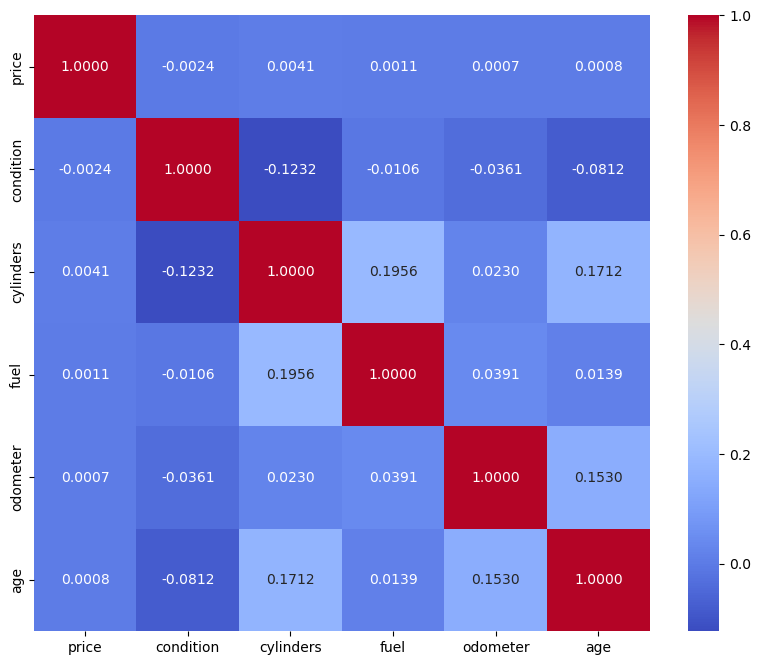

In [43]:
# Lets have a look on the correlation matrix plotted as heat map
correlation = vehicles_clean.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".4f", square=True)

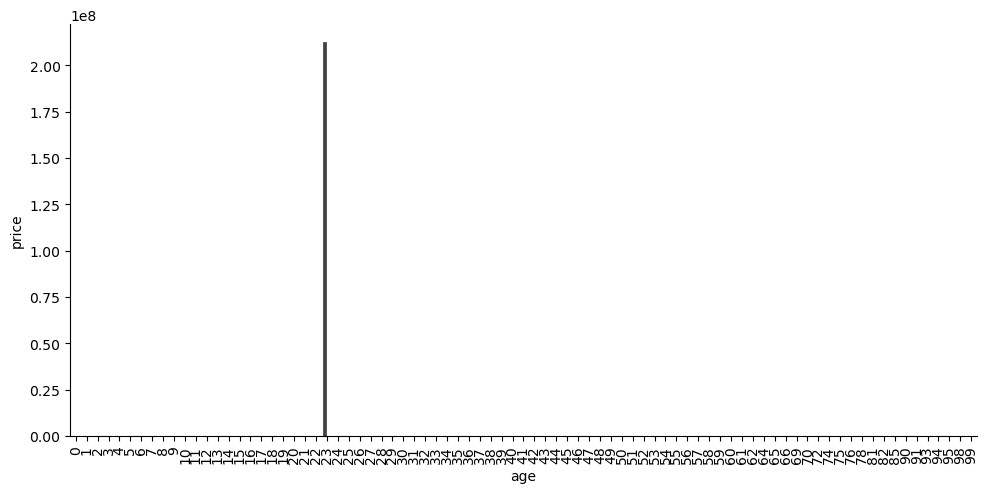

In [44]:
plt = sns.catplot(x='age', y='price', hue='age', data=vehicles_clean.sample(5000), kind='bar', aspect=2, height=5)
plt.set_xticklabels(rotation=90);

### Findings
The bar plot shows that new cars are expensiver than older cars, but with an age around 26 and older the cars become 
expensiver again.

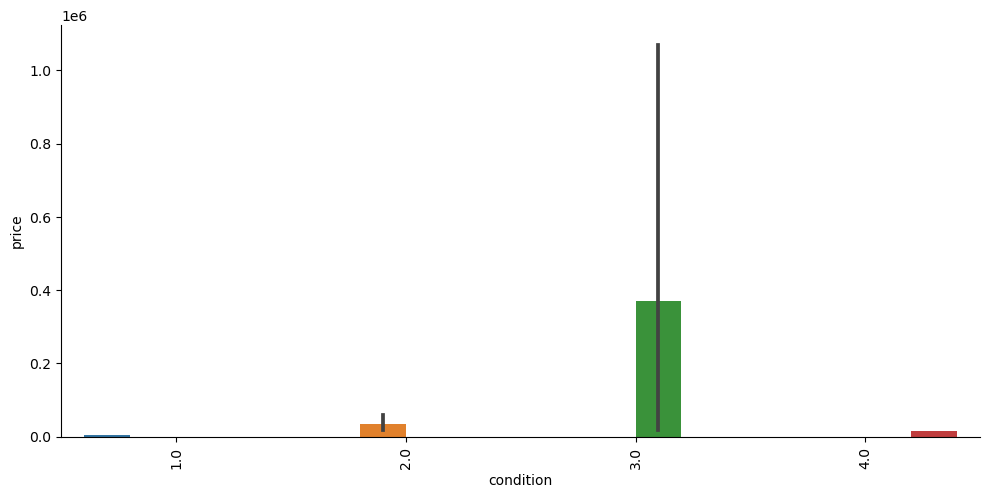

In [45]:
plt = sns.catplot(x='condition', y='price', hue='condition', data=vehicles_clean.sample(5000), kind='bar', aspect=2, height=5)
plt.set_xticklabels(rotation=90);

### Findings
The bar plot shows that not always the newest car have the highest price. 

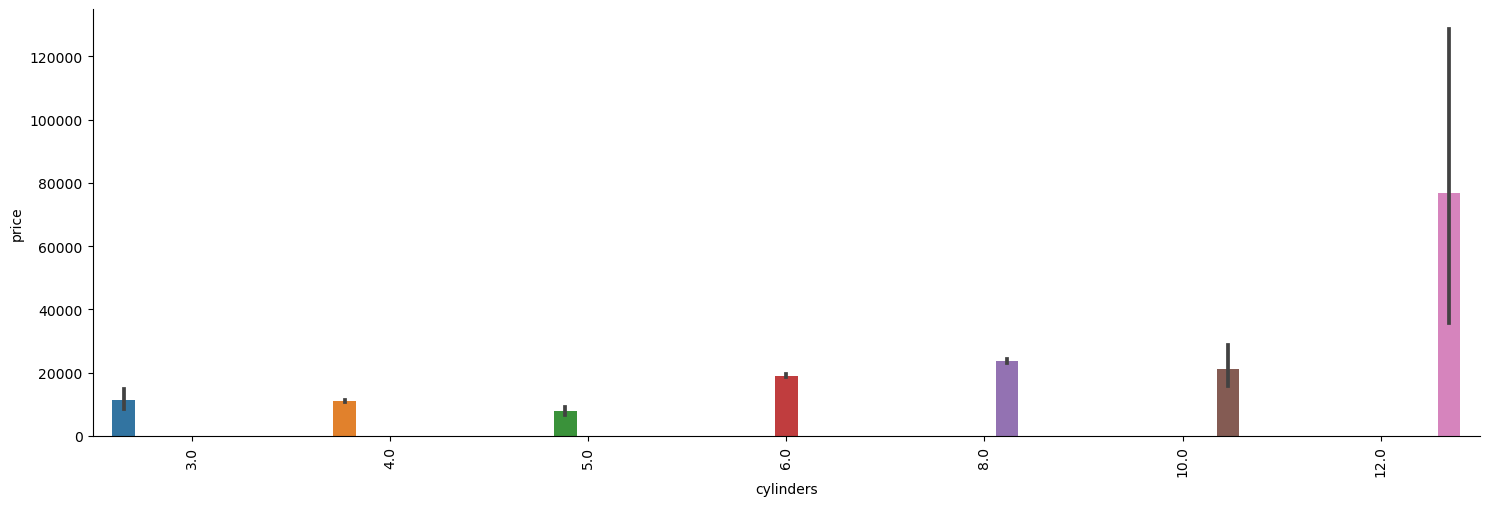

In [48]:
plt = sns.catplot(x='cylinders', y='price', hue='cylinders', data=vehicles_clean.sample(10000), kind='bar', aspect=3, height=5)
plt.set_xticklabels(rotation=90);

In [49]:
#plt = sns.catplot(x='odometer', y='price', hue='odometer', data=vehicles_clean.sample(1000), kind='bar', aspect=3, height=5)
#plt.set_xticklabels(rotation=90);

In [67]:
vehicles_clean.dropna()
vehicles_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223848 entries, 27 to 426878
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        223848 non-null  object 
 1   price         223848 non-null  int64  
 2   manufacturer  216098 non-null  object 
 3   model         221973 non-null  object 
 4   condition     169329 non-null  float64
 5   cylinders     223848 non-null  float64
 6   fuel          222669 non-null  float64
 7   odometer      223848 non-null  float64
 8   title_status  217772 non-null  object 
 9   transmission  223677 non-null  object 
 10  VIN           126725 non-null  object 
 11  drive         191636 non-null  object 
 12  size          99607 non-null   object 
 13  type          198517 non-null  object 
 14  paint_color   181393 non-null  object 
 15  state         223848 non-null  object 
 16  age           223848 non-null  int32  
dtypes: float64(4), int32(1), int64(1), object(11)
m

In [71]:
result = vehicles_clean.loc[(vehicles_clean['condition'] != 0), ['condition']]
result = result.groupby('condition').agg(max)
for i in range (len(result)):
    print(f"Show car condition <{i}> value:  ", result.iloc[i])

Show car condition <0> value:   Series([], Name: 1.0, dtype: float64)
Show car condition <1> value:   Series([], Name: 2.0, dtype: float64)
Show car condition <2> value:   Series([], Name: 3.0, dtype: float64)
Show car condition <3> value:   Series([], Name: 4.0, dtype: float64)


In [72]:
vehicles_clean.describe()

,price,condition,cylinders,fuel,odometer,age
count,2.238480e+05,169329.000000,223848.000000,222669.000000,2.238480e+05,223848.000000
mean,7.245987e+04,2.970147,5.935054,3.050200,1.054830e+05,12.000143
std,1.308070e+07,0.999067,1.601024,0.274948,1.951433e+05,9.959276
min,1.000000e+00,1.000000,3.000000,1.000000,0.000000e+00,0.000000
25%,6.500000e+03,2.000000,4.000000,3.000000,4.875200e+04,6.000000
50%,1.299500e+04,3.000000,6.000000,3.000000,9.690300e+04,10.000000
75%,2.545000e+04,4.000000,8.000000,3.000000,1.420000e+05,15.000000
max,3.736929e+09,4.000000,12.000000,4.000000,1.000000e+07,117.000000


In [94]:
# now copy only the selected features to the dataset for the further modeling
vehicles_clean = vehicles_clean[['cylinders','age','fuel', 'odometer', 'condition','price']]

In [97]:
vehicles_clean.dropna(inplace=True)

In [98]:
vehicles_clean.isnull().sum()

cylinders    0
age          0
fuel         0
odometer     0
condition    0
price        0
dtype: int64

In [99]:
vehicles_clean.value_counts().sum()

169329

In [100]:
vehicles_clean.describe()

,cylinders,age,fuel,odometer,condition,price
count,169329.000000,169329.000000,169329.000000,1.693290e+05,169329.000000,1.693290e+05
mean,5.992541,12.852671,3.045598,1.094869e+05,2.970147,7.160661e+04
std,1.591859,10.616985,0.264441,2.134266e+05,0.999067,1.314179e+07
min,3.000000,0.000000,1.000000,0.000000e+00,1.000000,1.000000e+00
25%,4.000000,6.000000,3.000000,5.027700e+04,2.000000,5.999000e+03
50%,6.000000,10.000000,3.000000,1.000000e+05,3.000000,1.197000e+04
75%,8.000000,16.000000,3.000000,1.461920e+05,4.000000,2.490000e+04
max,12.000000,117.000000,4.000000,1.000000e+07,4.000000,3.736929e+09


In [102]:
vehicles_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169329 entries, 27 to 426878
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   cylinders  169329 non-null  float64
 1   age        169329 non-null  int32  
 2   fuel       169329 non-null  float64
 3   odometer   169329 non-null  float64
 4   condition  169329 non-null  float64
 5   price      169329 non-null  int64  
dtypes: float64(4), int32(1), int64(1)
memory usage: 8.4 MB


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Used Regression Models
- 1.) Lasso Regression
- 2.) Linear Regression
- 3.) Ridge Regression

In [105]:
# devide the training and test set
X = vehicles_clean[['cylinders','age','fuel', 'odometer', 'condition']]
y = vehicles_clean['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
vehicles_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169329 entries, 27 to 426878
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   cylinders  169329 non-null  float64
 1   age        169329 non-null  int32  
 2   fuel       169329 non-null  float64
 3   odometer   169329 non-null  float64
 4   condition  169329 non-null  float64
 5   price      169329 non-null  int64  
dtypes: float64(4), int32(1), int64(1)
memory usage: 8.4 MB


### 1.) Lasso Regression
On the begin lets try a lasso regression model and see which features are stay on the end, because lasso also reduces the 
features.

In [148]:
pipe_lasso = Pipeline([('polyfeatures', PolynomialFeatures(degree = 3, include_bias = False)),
                       ('scaler', StandardScaler()),
                       ('lasso', Lasso(max_iter=10000000, positive=True, random_state = 42))])
pipe_lasso.fit(X_train, y_train)
lasso_coefs = pipe_lasso.named_steps['lasso'].coef_
print(lasso_coefs)
pipe_lasso

[33138.22690665     0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.         25060.74313647 12499.17122391     0.
     0.             0.             0.             0.
     0.             0.             0.         36217.64389831
     0.             0.             0.             0.
     0.             0.         12705.20056725     0.
     0.             0.             0.             0.
     0.             0.             0.        ]


Pipeline(steps=[('polyfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('scaler', StandardScaler()),
                ('lasso',
                 Lasso(max_iter=10000000, positive=True, random_state=42))])

In [201]:
# copute the mse for training and developent set for comparing
lasso_train_mse = mean_squared_error(y_train, pipe_lasso.predict(X_train))
lasso_test_mse  = mean_squared_error(y_test, pipe_lasso.predict(X_test))
# print the mse devided by 1000.000.000 to make it more readable
print(f'Train MSE  :      {round(lasso_train_mse/1000000000)}')
print(f'Test  MSE  :         {round(lasso_test_mse/1000000000)}')

Train MSE  :      246584
Test  MSE  :         318


In [150]:
# Now print the features with their names and coefficients
feature_names = pipe_lasso.named_steps['polyfeatures'].get_feature_names_out()
lasso_df      = pd.DataFrame({'feature': feature_names, 'coef': lasso_coefs})
print(type(feature_names))
lasso_df.loc[lasso_df['coef'] != 0]

<class 'numpy.ndarray'>


,feature,coef
0,cylinders,33138.226907
29,cylinders fuel^2,25060.743136
30,cylinders fuel odometer,12499.171224
39,age fuel^2,36217.643898
46,fuel^2 odometer,12705.200567


### The above printed features stays after in the lasso regression model
There are only five features for computing the model. This is a nice a feature of lasso regresion.

### 2.) Linear Regression
Now we will make a LinearRegression model with a Lasso feature selection.

In [221]:
#Lets try to use lasso for feature selection
model_selector_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = 3, include_bias = False)),
                                ('scaler', StandardScaler()),
                                ('selector', SelectFromModel(Lasso())),
                                ('linreg', LinearRegression())])

In [222]:
model_selector_pipe.fit(X_train, y_train)
selector_train_mse = mean_squared_error(y_train, model_selector_pipe.predict(X_train))
selector_test_mse  = mean_squared_error(y_test, model_selector_pipe.predict(X_test))
model_selector_pipe

C:\Users\UNR\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.458e+19, tolerance: 2.923e+15
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('polyfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('scaler', StandardScaler()),
                ('selector', SelectFromModel(estimator=Lasso())),
                ('linreg', LinearRegression())])

In [223]:
# print the mse devided by 1000.000.000 to make it more readable
print(f'Train MSE  :      {round(selector_train_mse/1000000000)}')
print(f'Test  MSE  :         {round(selector_test_mse/1000000000)}')

Train MSE  :      246530
Test  MSE  :         374


In [233]:
# Now print the features with their names and coefficients
feature_names = model_selector_pipe.named_steps['polyfeatures'].get_feature_names_out()
linear_coefs  = model_selector_pipe.named_steps['linreg'].coef_

linear_df      = pd.DataFrame({'polyfeatures': feature_names, 'coef': linear_coefs})
print(type(feature_names))
linear_df.loc[linear_df['coef'] != 0]

<class 'numpy.ndarray'>


,polyfeatures,coef
0,cylinders,8.249335e+05
1,age,-1.362544e+06
2,fuel,-1.245922e+06
3,odometer,-2.051333e+05
4,condition,-1.287051e+07
5,cylinders^2,-1.441328e+06
6,cylinders age,-1.447935e+06
7,cylinders fuel,9.810601e+05
8,cylinders odometer,-2.306929e+06
9,cylinders condition,-8.673593e+05


### 3.) Ridge Regression

In [246]:
# lets try ridge regression with different alpha
ridge_param_dict = {'ridge__alpha': np.logspace(0, 10, 50)}
ridge_pipe = Pipeline([('scaler', StandardScaler()), 
                      ('ridge', Ridge())])
ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_param_dict)
ridge_grid.fit(X_train, y_train)
ridge_train_preds = ridge_grid.predict(X_train)
ridge_test_preds  = ridge_grid.predict(X_test)
ridge_train_mse   = mean_squared_error(y_train, ridge_train_preds)
ridge_test_mse    = mean_squared_error(y_test, ridge_test_preds)
print(f'Train MSE  :      {round(ridge_train_mse/1000000000)}')
print(f'Test  MSE  :         {round(ridge_test_mse/1000000000)}')
best_alpha = ridge_grid.best_params_
print(f'Best alpha :    {round(list(best_alpha.values())[0],0)}')
ridge_pipe

Train MSE  :      246590
Test  MSE  :         312
Best alpha :    13894955.0


Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge())])

In [247]:
# print the parameter of grid search
print(ridge_grid.get_params()['param_grid'])
print(ridge_grid)

{'ridge__alpha': array([1.00000000e+00, 1.59985872e+00, 2.55954792e+00, 4.09491506e+00,
       6.55128557e+00, 1.04811313e+01, 1.67683294e+01, 2.68269580e+01,
       4.29193426e+01, 6.86648845e+01, 1.09854114e+02, 1.75751062e+02,
       2.81176870e+02, 4.49843267e+02, 7.19685673e+02, 1.15139540e+03,
       1.84206997e+03, 2.94705170e+03, 4.71486636e+03, 7.54312006e+03,
       1.20679264e+04, 1.93069773e+04, 3.08884360e+04, 4.94171336e+04,
       7.90604321e+04, 1.26485522e+05, 2.02358965e+05, 3.23745754e+05,
       5.17947468e+05, 8.28642773e+05, 1.32571137e+06, 2.12095089e+06,
       3.39322177e+06, 5.42867544e+06, 8.68511374e+06, 1.38949549e+07,
       2.22299648e+07, 3.55648031e+07, 5.68986603e+07, 9.10298178e+07,
       1.45634848e+08, 2.32995181e+08, 3.72759372e+08, 5.96362332e+08,
       9.54095476e+08, 1.52641797e+09, 2.44205309e+09, 3.90693994e+09,
       6.25055193e+09, 1.00000000e+10])}
GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                     

In [248]:
# Now print the features with their names and coefficients
ridge_coefs   = pipe_ridge.named_steps['ridge'].coef_
ridge_df      = pd.DataFrame({'ridge': feature_names, 'coef': ridge_coefs})
print(type(feature_names))
ridge_df.loc[ridge_df['coef'] != 0]

<class 'numpy.ndarray'>


,ridge,coef
0,cylinders,8.985735e+05
1,age,-3.435775e+05
2,fuel,-5.775383e+05
3,odometer,6.258101e+05
4,condition,-7.492657e+06
5,cylinders^2,-1.223507e+06
6,cylinders age,-1.328139e+06
7,cylinders fuel,5.994082e+05
8,cylinders odometer,-1.920672e+06
9,cylinders condition,-9.729821e+05


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.